# ARUCO markers: basics

## 1:  Marker creation

In [20]:
import numpy as np
import pandas as pd

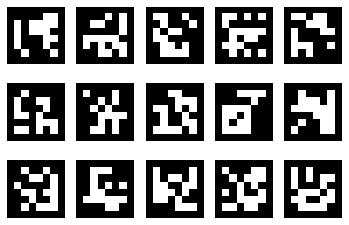

In [21]:
import matplotlib.pyplot as plt
import cv2 
from cv2 import aruco

aruco_dict = cv2.aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 5
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = cv2.aruco.generateImageMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = plt.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("markers.pdf")

plt.savefig("markers.png")
plt.show()


## 2: Print, cut, stick and take a picture

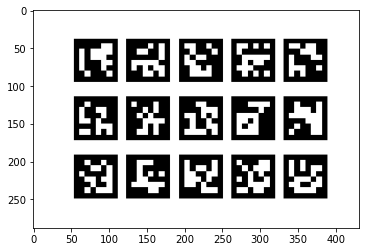

In [22]:
frame = cv2.imread("markers.png")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(frame)
plt.show()

## 3: Post processing

In [23]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


Wall time: 11.8 ms


Pretty fast processing !

## 4: Results

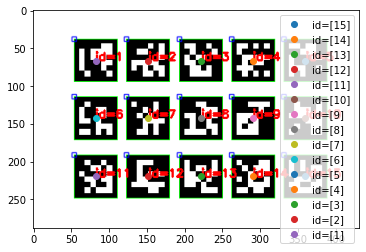

In [24]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [25]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1     c2     c3     c4     m1     m2     m3     m4      o
marker                                                                 
1      x   54.0  111.0  111.0   54.0   82.5  111.0   82.5   54.0   82.5
       y   38.0   38.0   94.0   94.0   38.0   66.0   94.0   66.0   66.0
2      x  123.0  180.0  180.0  123.0  151.5  180.0  151.5  123.0  151.5
       y   38.0   38.0   94.0   94.0   38.0   66.0   94.0   66.0   66.0
3      x  193.0  250.0  250.0  193.0  221.5  250.0  221.5  193.0  221.5
       y   38.0   38.0   94.0   94.0   38.0   66.0   94.0   66.0   66.0
4      x  262.0  319.0  319.0  262.0  290.5  319.0  290.5  262.0  290.5
       y   38.0   38.0   94.0   94.0   38.0   66.0   94.0   66.0   66.0
5      x  331.0  388.0  388.0  331.0  359.5  388.0  359.5  331.0  359.5
       y   38.0   38.0   94.0   94.0   38.0   66.0   94.0   66.0   66.0
6      x   54.0  111.0  111.0   54.0   82.5  111.0   82.5   54.0   82.5
       y  114.0  114.0  171.0  171.0  114.0  142.5  171.0  142.5  142.5
7      x  123.0  180.0  180.0  123.0  151.5  180.0  151.5  123.0  151.5
       y  114.0  114.0  171.0  171.0  114.0  142.5  171.0  142.5  142.5
8      x  193.0  250.0  250.0  193.0  221.5  250.0  221.5  193.0  221.5
       y  114.0  114.0  171.0  171.0  114.0  142.5  171.0  142.5  142.5
9      x  262.0  319.0  319.0  262.0  290.5  319.0  290.5  262.0  290.5
       y  114.0  114.0  171.0  171.0  114.0  142.5  171.0  142.5  142.5
10     x  331.0  388.0  388.0  331.0  359.5  388.0  359.5  331.0  359.5
       y  114.0  114.0  171.0  171.0  114.0  142.5  171.0  142.5  142.5
11     x   54.0  111.0  111.0   54.0   82.5  111.0   82.5   54.0   82.5
       y  191.0  191.0  248.0  248.0  191.0  219.5  248.0  219.5  219.5
12     x  123.0  180.0  180.0  123.0  151.5  180.0  151.5  123.0  151.5
       y  191.0  191.0  248.0  248.0  191.0  219.5  248.0  219.5  219.5
13     x  193.0  250.0  250.0  193.0  221.5  250.0  221.5  193.0  221.5
       y  191.0  191.0  248.0  248.0  191.0  219.5  248.0  219.5  219.5
14     x  262.0  319.0  319.0  262.0  290.5  319.0  290.5  262.0  290.5
       y  191.0  191.0  248.0  248.0  191.0  219.5  248.0  219.5  219.5
15     x  331.0  388.0  388.0  331.0  359.5  388.0  359.5  331.0  359.5
       y  191.0  191.0  248.0  248.0  191.0  219.5  248.0  219.5  219.5

In [26]:
nMarkers= 15

In [27]:
import os
if not os.path.isfile("tutorial_camera_params.yml"):
    print("File not found")
else:
    print("File found")

File found


In [28]:
import cv2
import numpy as np

cameraMatrix = None
distCoeffs = None

# Read camera parameters from tutorial_camera_params.yml
fs = cv2.FileStorage("tutorial_camera_params.yml", cv2.FILE_STORAGE_READ)
cameraMatrix = fs.getNode("cameraMatrix").mat()
distCoeffs = fs.getNode("distCoeffs").mat()
fs.release()

rvecs = []
tvecs = []

# Set coordinate system
objPoints = np.array([[0,0,0], [1,0,0], [1,1,0], [0,1,0]], dtype=np.float32)

# Make sure that nMarkers variable is initialized and the number of markers is greater than zero
if nMarkers > 0:
    # Calculate pose for each marker
    for i in range(nMarkers):
        ret, rvec, tvec = cv2.solvePnP(objPoints, corners[i], cameraMatrix, distCoeffs)
        rvecs.append(rvec)
        tvecs.append(tvec)

In [29]:
inputImage = frame
outputImage = inputImage.copy()
plt.figure()
plt.imshow(outputImage)
for i in range(len(rvecs)):
    rvec = rvecs[i]
    tvec = tvecs[i]
    cv2.drawFrameAxes(outputImage, cameraMatrix, distCoeffs, rvec, tvec, 0.1)

plt.show()

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np

# load the image
image = cv2.imread("markers.png")

# detect markers and estimate their pose
corners, ids, _ = cv2.aruco.detectMarkers(image, cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250))
rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, cameraMatrix, distCoeffs)

# create the 3D axis points
axisPoints = np.float32([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 0.01]]).reshape(-1, 3)

# project the 3D axis points onto the image
for i in range(len(rvecs)):
    imagePoints, _ = cv2.projectPoints(axisPoints, rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    imagePoints = np.int32(imagePoints.reshape(-1, 2))
    # draw lines to connect the projected points
    cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[1]), (255,0,0), 3)
    cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[2]), (0,255,0), 3)
    cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[0]), (0,0,255), 3)

#show the image with the axis overlayed
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
rvecs

array([[[-3.13936755e+00, -4.61808304e-03,  5.63415096e-02]],

       [[-3.13923453e+00, -4.49710908e-03,  5.24964023e-02]],

       [[ 3.14256480e+00,  4.39610841e-03, -5.18381047e-02]],

       [[ 3.13952549e+00,  4.24644633e-03, -6.36918212e-02]],

       [[ 3.13248438e+00,  4.01524001e-03, -9.89428622e-02]],

       [[-3.14177390e+00, -5.02748244e-03,  4.45434432e-02]],

       [[ 3.14064159e+00,  5.04015246e-03, -4.50644458e-02]],

       [[ 3.13848597e+00,  4.91612962e-03, -5.03054559e-02]],

       [[ 3.13212453e+00,  4.66182689e-03, -7.00081556e-02]],

       [[ 3.12009032e+00,  4.30245655e-03, -1.13362856e-01]],

       [[ 3.11029499e+00, -8.47535327e-03,  7.57576977e-03]],

       [[ 3.11432285e+00, -8.08921323e-03,  1.32731673e-03]],

       [[ 3.11366003e+00, -7.38738697e-03, -1.43778708e-02]],

       [[ 3.10634355e+00, -6.53787116e-03, -4.81046709e-02]],

       [[ 3.09157155e+00, -5.69684659e-03, -1.05369065e-01]]])

In [ ]:
tvecs

array([[[-0.24918237, -0.12359093,  0.83405675]],

       [[-0.30932253, -0.12361313,  0.83511492]],

       [[-0.36948521, -0.12366632,  0.83630703]],

       [[-0.43054112, -0.12374441,  0.83790494]],

       [[-0.49074327, -0.12384031,  0.84057406]],

       [[-0.24957185, -0.19151989,  0.83603911]],

       [[-0.309702  , -0.19145916,  0.83665853]],

       [[-0.36983538, -0.1914467 ,  0.83759102]],

       [[-0.43084861, -0.191471  ,  0.83920424]],

       [[-0.4910017 , -0.19152368,  0.84223869]],

       [[-0.25200096, -0.26133152,  0.84508009]],

       [[-0.31326677, -0.26169233,  0.84710714]],

       [[-0.37457853, -0.26198981,  0.84928059]],

       [[-0.43679183, -0.26224044,  0.85221179]],

       [[-0.49812042, -0.26245597,  0.8567849 ]]])

In [ ]:
import cv2

# Load image
image = cv2.imread("markers.png")

# Define crop coordinates
x, y, w, h = 100, 100, 200, 200

# Crop image
cropped_image = image[y:y+h, x:x+w]

# Define rotation angle
angle = 45

# Get image dimensions
(h, w) = cropped_image.shape[:2]

# Calculate center of image
center = (w / 2, h / 2)

# Perform rotation using warpAffine function
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(cropped_image, rotation_matrix, (w, h))

# Show original and rotated images
cv2.imshow("Original Image", image)
cv2.imshow("Rotated Image", rotated_image)

# detect markers and estimate their pose
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
corners, ids, _ = cv2.aruco.detectMarkers(rotated_image, dictionary)
rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, cameraMatrix, distCoeffs)

# create the 3D axis points
axisPoints = np.float32([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 0.01]]).reshape(-1, 3)

# project the 3D axis points onto the image
for i in range(len(rvecs)):
    imagePoints, _ = cv2.projectPoints(axisPoints, rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    imagePoints = np.int32(imagePoints.reshape(-1, 2))
    # draw lines to connect the projected points
    cv2.line(rotated_image, tuple(imagePoints[0]), tuple(imagePoints[1]), (255,0,0), 3)
    cv2.line(rotated_image, tuple(imagePoints[0]), tuple(imagePoints[2]), (0,255,0), 3)
    cv2.line(rotated_image, tuple(imagePoints[0]), tuple(imagePoints[0]), (0,0,255), 3)

#show the image with the axis overlayed
cv2.imshow("Markers detected", rotated_image)

# Wait for key press and close window
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
rvecs

array([[[-2.91854016,  1.20746591,  0.0708921 ]],

       [[ 2.81885757, -1.15631325, -0.11440148]]])

In [ ]:
import cv2
import numpy as np

# Load list of images
images = [cv2.imread("images/photo_2023-02-17_14-51-10.jpg"), cv2.imread("images/photo_2023-02-17_14-51-12.jpg"), cv2.imread("images/photo_2023-02-17_14-51-14.jpg"), cv2.imread("images/photo_2023-02-17_14-51-15.jpg"), cv2.imread("images/photo_2023-02-17_14-51-16.jpg"), cv2.imread("images/photo_2023-02-17_14-51-17.jpg"), cv2.imread("images/photo_2023-02-17_14-51-18.jpg"), cv2.imread("images/photo_2023-02-17_14-51-19.jpg"), cv2.imread("images/photo_2023-02-17_14-51-20.jpg"), cv2.imread("images/photo_2023-02-17_14-51-21.jpg"), cv2.imread("images/photo_2023-02-17_14-51-22.jpg"), cv2.imread("images/photo_2023-02-17_14-51-23.jpg"), cv2.imread("images/photo_2023-02-17_14-51-24.jpg"), cv2.imread("images/photo_2023-02-17_14-51-25.jpg")]

for image in images:
    # detect markers and estimate their pose
    corners, ids, _ = cv2.aruco.detectMarkers(image, cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250))
    if ids is not None:
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, cameraMatrix, distCoeffs)

        # create the 3D axis points
        axisPoints = np.float32([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 0.01], [0, 0, -0.01]]).reshape(-1, 3)

        # project the 3D axis points onto the image
        for i in range(len(rvecs)):
            imagePoints, _ = cv2.projectPoints(axisPoints, rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
            imagePoints = np.int32(imagePoints.reshape(-1, 2))
            # draw lines to connect the projected points
            cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[1]), (255,0,0), 3)
            cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[2]), (0,255,0), 3)
            cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[3]), (0,0,255), 3)
    #show the image with the axis overlayed
    cv2.imshow("Marker Detection", image)
    cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load image
image = cv2.imread("images/photo_2023-02-17_14-51-10.jpg")

# Fix brightness and contrast
alpha = 2 # Contrast control (1.0-3.0)
beta = -25 # Brightness control (0-100)
image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Apply adaptive thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
ret, threshold_image = cv2.threshold(gray, 127, 255, 0)

# detect markers and estimate their pose
corners, ids, _ = cv2.aruco.detectMarkers(threshold_image, cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250))
rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, cameraMatrix, distCoeffs)

# create the 3D axis points
axisPoints = np.float32([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 0.01], [0, 0, -0.01]]).reshape(-1, 3)

# project the 3D axis points onto the image
for i in range(len(rvecs)):
    imagePoints, _ = cv2.projectPoints(axisPoints, rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    imagePoints = np.int32(imagePoints.reshape(-1, 2))
    # draw lines to connect the projected points
    cv2.line(threshold_image, tuple(imagePoints[0]), tuple(imagePoints[1]), (255,0,0), 3)
    cv2.line(threshold_image, tuple(imagePoints[0]), tuple(imagePoints[2]), (0,255,0), 3)
    cv2.line(threshold_image, tuple(imagePoints[0]), tuple(imagePoints[3]), (0,0,255), 3)

# show the image with the axis overlayed
cv2.imshow("Image with Axis", threshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
rvecs

array([[[-2.80605687, -0.03426719,  0.30496752]],

       [[-2.30538991, -1.4245787 , -0.12463366]],

       [[-2.50467834,  1.40180868,  0.65719349]]])

To use two cameras in a stereo vision system for detecting Aruco markers, you can follow these steps:

1. Calibrate the cameras: You need to calibrate both cameras to get their intrinsic and extrinsic parameters. You can use a calibration pattern, like a chessboard, and OpenCV's cv2.calibrateCamera() function to obtain the parameters.

2. Capture stereo images: Capture stereo images using both cameras simultaneously. The cameras should be synchronized to obtain the same views at the same time.

3. Rectify the images: Rectify the stereo images using the cv2.stereoRectify() function to remove distortions and align the images along the epipolar line.

4. Detect Aruco markers: Use the cv2.aruco.detectMarkers() function to detect the Aruco markers in each rectified image.

5. Calculate the 3D position of the markers: Use the cv2.aruco.estimatePoseSingleMarkers() function to estimate the pose of the markers in each image. This will give you the rotation and translation vectors for each marker.

6. Triangulate the position of the markers: Use the rotation and translation vectors to triangulate the position of the markers in 3D space. You can use the cv2.triangulatePoints() function to do this.

7. Calculate the depth of the markers: Calculate the depth of the markers by measuring the distance between the two cameras and the 3D position of the markers.


In [ ]:
import cv2
import numpy as np

# Load image
images = [cv2.imread("1.jpg"), cv2.imread("2.jpg")]

for image in images:
    # Fix brightness and contrast
    alpha = 2 # Contrast control (1.0-3.0)
    beta = -25 # Brightness control (0-100)
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Apply adaptive thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    ret, threshold_image = cv2.threshold(thresh, 127, 255, 0)

    # detect markers and estimate their pose
    corners, ids, _ = cv2.aruco.detectMarkers(threshold_image, cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250))
    if ids is not None:
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, 0.05, cameraMatrix, distCoeffs)

        # create the 3D axis points
        axisPoints = np.float32([[0.01, 0, 0], [0, 0.01, 0], [0, 0, 0.01], [0, 0, -0.01]]).reshape(-1, 3)

        # project the 3D axis points onto the image
        for i in range(len(rvecs)):
            imagePoints, _ = cv2.projectPoints(axisPoints, rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
            imagePoints = np.int32(imagePoints.reshape(-1, 2))
            # draw lines to connect the projected points
            cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[1]), (255,0,0), 3)
            cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[2]), (0,255,0), 3)
            cv2.line(image, tuple(imagePoints[0]), tuple(imagePoints[3]), (0,0,255), 3)

        #cv2.aruco.drawDetectedMarkers(image, corners, ids)

    #show the image with the axis overlayed
    cv2.imshow("image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
rvecs

array([[[ 2.38886044,  2.1038921 , -1.12833194]],

       [[ 0.07027563,  3.7178118 , -0.1130132 ]]])

To find the intersection of three markers with 120 degrees between them, you can use the following steps:

Identify the markers that you want to use for finding the intersection. You can do this by looking at the ids array returned by the cv2.aruco.detectMarkers function.

Once you have identified the markers you want to use, you can use the cv2.aruco.estimatePoseSingleMarkers function to estimate the pose of each marker in 3D space.

Next, you can use the 3D pose information to compute the positions of the three markers relative to a common coordinate system. One way to do this is to define the position of one of the markers as the origin of the coordinate system, and then use the relative positions of the other two markers to compute their positions in the coordinate system.

Finally, you can compute the intersection of the three markers by finding the point where the lines connecting the markers' 3D positions intersect.

To find the intersection of ArUco markers detected in an image, we can use their poses and corresponding transformation matrices. The idea is to transform each marker's coordinates to a common reference frame and then find the intersection of the markers in that reference frame.

Here are the general steps to achieve this:

Detect ArUco markers in the image and estimate their poses (i.e., rotation and translation vectors).
Convert the rotation and translation vectors to a transformation matrix for each marker.
Choose a marker as a reference (e.g., the first detected marker).
Transform the poses of all other markers with respect to the reference marker's pose.
Calculate the intersection of the transformed markers in the reference frame.

## Video Input

In [ ]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.6.0 =====================================
  Version control:               unknown

  Extra modules:
    Location (extra):            /io/opencv_contrib/modules
    Version control (extra):     unknown

  Platform:
    Timestamp:                   2022-06-07T10:28:32Z
    Host:                        Linux 5.13.0-1025-azure x86_64
    CMake:                       3.22.5
    CMake generator:             Unix Makefiles
    CMake build tool:            /bin/gmake
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):        

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
cap.isOpened()

True

In [ ]:
cap.release()

In [ ]:
ret, frame = cap.read()

In [ ]:
print(ret)

True


## Real-time input

In [63]:
import cv2

inputVideo = cv2.VideoCapture(0)
#print(type(inputVideo))
#check if connection with camera is successfully
if inputVideo.isOpened():
    ret, frame = inputVideo.read()  #capture a frame from live video

print(inputVideo.isOpened())

cameraMatrix = None
distCoeffs = None
markerLength = 0.05

# You can read camera parameters from tutorial_camera_params.yml
fs = cv2.FileStorage("tutorial_camera_params.yml", cv2.FILE_STORAGE_READ)
cameraMatrix = fs.getNode("cameraMatrix").mat()
distCoeffs = fs.getNode("distCoeffs").mat()
fs.release()

# Set coordinate system
objPoints = np.array([[-markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, -markerLength/2.0, 0], [-markerLength/2.0, -markerLength/2.0, 0]], dtype=np.float32)

detectorParams = cv2.aruco.DetectorParameters()
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

while True:
    ret, frame = inputVideo.read()
    if not ret:
        break
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(image, dictionary, parameters=detectorParams)
    if ids is not None and len(ids) > 0:
        cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
        for rvec, tvec in zip(rvecs, tvecs):
            cv2.drawFrameAxes(frame, cameraMatrix, distCoeffs, rvec, tvec, 0.1)
    cv2.imshow("out", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

inputVideo.release()
cv2.destroyAllWindows()

True


In [57]:
import cv2
import numpy as np
import pandas as pd

inputVideo = cv2.VideoCapture(0)

if inputVideo.isOpened():
    ret, frame = inputVideo.read()

print(inputVideo.isOpened())

cameraMatrix = None
distCoeffs = None
markerLength = 0.05

fs = cv2.FileStorage("tutorial_camera_params.yml", cv2.FILE_STORAGE_READ)
cameraMatrix = fs.getNode("cameraMatrix").mat()
distCoeffs = fs.getNode("distCoeffs").mat()
fs.release()

objPoints = np.array([[-markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, -markerLength/2.0, 0], [-markerLength/2.0, -markerLength/2.0, 0]], dtype=np.float32)

detectorParams = cv2.aruco.DetectorParameters()
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

pose_data = pd.DataFrame(columns=['Time', 'Marker ID', 'tx', 'ty', 'tz', 'rx', 'ry', 'rz'])

while True:
    ret, frame = inputVideo.read()
    if not ret:
        break
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(image, dictionary, parameters=detectorParams)
    if ids is not None and len(ids) > 0:
        cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
        for id, rvec, tvec in zip(ids, rvecs, tvecs):
            cv2.drawFrameAxes(frame, cameraMatrix, distCoeffs, rvec, tvec, 0.1)
            data = {'Time': pd.Timestamp.now(), 'Marker ID': int(id), 'tx': tvec[0][0], 'ty': tvec[0][1], 'tz': tvec[0][2], 'rx': rvec[0][0], 'ry': rvec[0][1], 'rz': rvec[0][2]}
            pose_data = pose_data.append(data, ignore_index=True)
    cv2.imshow("out", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

pose_data.to_excel("pose_data.xlsx", index=False)
inputVideo.release()
cv2.destroyAllWindows()

True


## Video input

In [1]:
import cv2
import numpy as np
import pandas as pd

inputVideo = cv2.VideoCapture("video\whiteBorders.mp4")

if inputVideo.isOpened():
    ret, frame = inputVideo.read()

print(inputVideo.isOpened())

cameraMatrix = None
distCoeffs = None
markerLength = 0.05

fs = cv2.FileStorage("tutorial_camera_params.yml", cv2.FILE_STORAGE_READ)
cameraMatrix = fs.getNode("cameraMatrix").mat()
distCoeffs = fs.getNode("distCoeffs").mat()
fs.release()

objPoints = np.array([[-markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, -markerLength/2.0, 0], [-markerLength/2.0, -markerLength/2.0, 0]], dtype=np.float32)

detectorParams = cv2.aruco.DetectorParameters()
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

pose_data = pd.DataFrame(columns=['Time', 'Marker ID', 'tx', 'ty', 'tz', 'rx', 'ry', 'rz'])

while True:
    ret, frame = inputVideo.read()
    if not ret:
        break
    height, width = frame.shape[:2]
    scale = 0.5
    scaled_frame = cv2.resize(frame, (int(width*scale), int(height*scale)))
    image = cv2.cvtColor(scaled_frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(image, dictionary, parameters=detectorParams)
    if ids is not None and len(ids) > 0:
        cv2.aruco.drawDetectedMarkers(scaled_frame, corners, ids)
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
        for id, rvec, tvec in zip(ids, rvecs, tvecs):
            cv2.drawFrameAxes(scaled_frame, cameraMatrix, distCoeffs, rvec, tvec, 0.1)

            if len(tvecs) == 3:
                intersection = np.mean(tvecs, axis=0)
                rvec = np.zeros((3,1))
                tvec = np.zeros((3,1))
                imgpts, _ = cv2.projectPoints(intersection, rvec, tvec, cameraMatrix, distCoeffs)

                # draw circle at intersection point
                center = tuple(map(int, imgpts[0].ravel()))
                cv2.circle(scaled_frame, center, 5, (0, 255, 0), -1)
            #data = {'Time': pd.Timestamp.now(), 'Marker ID': int(id), 'tx': tvec[0][0], 'ty': tvec[0][1], 'tz': tvec[0][2], 'rx': rvec[0][0], 'ry': rvec[0][1], 'rz': rvec[0][2]}
            #pose_data = pose_data.append(data, ignore_index=True)
    cv2.imshow("out", scaled_frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

pose_data.to_excel("pose_data.xlsx", index=False)
inputVideo.release()
cv2.destroyAllWindows()

True


## Image

In [49]:
import cv2
import numpy as np

# Load the input image
frame = cv2.imread('image_2023-03-13_18-04-32.png')

cameraMatrix = None
distCoeffs = None
markerLength = 0.05

fs = cv2.FileStorage("tutorial_camera_params.yml", cv2.FILE_STORAGE_READ)
cameraMatrix = fs.getNode("cameraMatrix").mat()
distCoeffs = fs.getNode("distCoeffs").mat()
fs.release()

objPoints = np.array([[-markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, markerLength/2.0, 0], [markerLength/2.0, -markerLength/2.0, 0], [-markerLength/2.0, -markerLength/2.0, 0]], dtype=np.float32)

detectorParams = cv2.aruco.DetectorParameters()
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, dictionary, parameters=detectorParams)

if ids is not None and len(ids) > 0:
    cv2.aruco.drawDetectedMarkers(frame, corners, ids)
    rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
    for id, rvec, tvec in zip(ids, rvecs, tvecs):
        cv2.drawFrameAxes(frame, cameraMatrix, distCoeffs, rvec, tvec, 0.1)

    if len(tvecs) == 3:
        intersection = np.mean(tvecs, axis=0)
        # Convert the intersection to a tuple of integers
        # project intersection point onto image plane
        rvecs, _ = cv2.Rodrigues(rvecs[1])
        imgpts, _ = cv2.projectPoints(intersection, rvec, tvec, cameraMatrix, distCoeffs)
        
        # draw circle at intersection point
        center = tuple(map(int, imgpts[0].ravel()))
        cv2.circle(frame, center, 10, (0, 255, 0), -1)
        cv2.putText(frame, f'Intersection: ({intersection[0][0]:.2f}, {intersection[0][1]:.2f}, {intersection[0][2]:.2f})', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
cv2.imshow("out", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
print(ids)

[[ 3]
 [15]
 [11]]


In [48]:
rvecs

array([[-0.98299538,  0.1686383 ,  0.07267197],
       [ 0.1649313 ,  0.98480668, -0.05434575],
       [-0.08073262, -0.04143574, -0.99587415]])

In [50]:
tvecs

array([[[0.37758934, 0.34003782, 0.81333068]],

       [[0.15235282, 0.24567733, 0.80385046]],

       [[0.31905223, 0.08592008, 0.76029904]]])